In [1]:
import numpy as np
import pandas as pd
import matplotlib
print matplotlib.__version__
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
import ecc_calc as gwcalc
import unit_convert

%matplotlib inline

matplotlib.rcParams.update({'font.size': 18})

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1011/syr904/projects/SGRB'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1011/syr904/projects/SGRB/'

1.5.1


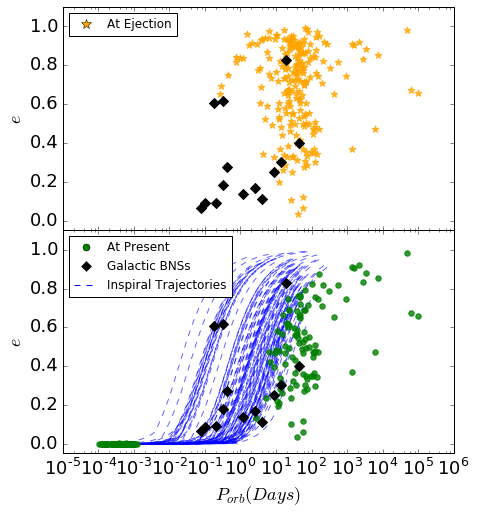

In [24]:
###Plot the evolution of the eccentricity and semi-major axis of the escaped binary NSs
datanum=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Escbns.dat')
m0=datanum[:,4]; m1=datanum[:,5]; semimajor=datanum[:,8]; ecc=datanum[:,9]
t_esc=np.array(datanum[:,2]); t_inspiral=np.array(datanum[:,3])
ttot=t_esc+t_inspiral  ##in Myr
t_evolv=14000.-t_esc ##in Myr
#print t_evolv, t_esc, t_inspiral

dataobs=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/galactic_bns.dat')
Pobs=dataobs[:,1]; eobs=dataobs[:,2]; m0obs=dataobs[:,3]; m1obs=dataobs[:,4]

##Change the observed periods to sma
#ag=[]; eg=[]; m0g=[]; m1g=[]
#for k in range(len(Pobs)):
#    if m0obs[k]>0:
#        ag.append(unit_convert.period_to_au(Pobs[k], m0obs[k], m1obs[k]))
#        eg.append(eobs[k]); m0g.append(m0obs[k]); m1g.append(m1obs[k])


##Change the model sma to periods
Pm=[]
for k in range(len(semimajor)):
    Pm.append(unit_convert.au_to_period(semimajor[k], m0[k], m1[k]))
    

rdot=mlines.Line2D([], [],  linestyle = 'None', color='r', marker='o',
                  markersize=6, label='At 14 Gyr')
ystar=mlines.Line2D([], [],  linestyle = 'None', color='orange', marker='*',
                  markersize=10, label='At Ejection')
kdot=mlines.Line2D([], [],  linestyle = 'None', color='k', marker='D',
                  markersize=7, label='Galactic BNSs')
gdot=mlines.Line2D([], [],  linestyle = 'None', color='g', marker='o',
                  markersize=7, label='At Present')
bline=mlines.Line2D([], [],  linestyle = '--', color='b', label='Inspiral Trajectories')

plt.rcParams['figure.figsize'] = [7, 8]

fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)
for i in range(len(m0)):
    P=[]
    if ttot[i]<=14000.:
        t, a, e=gwcalc.t_inspiral_2(semimajor[i], ecc[i], m0[i], m1[i], 0, 1, 0, 1100)
        for j in range(len(a)):     
            P.append(unit_convert.au_to_period(a[j], m0[i], m1[i]))
        ax2.plot(P,e, color='b', lw=1.0, ls='--', zorder=1, alpha=0.6)
        ax2.scatter(P[-1], e[-1], color='green', s=30, marker='o', alpha=0.8, zorder=2)
    else:
        t, a, e=gwcalc.t_inspiral_2(semimajor[i], ecc[i], m0[i], m1[i], t_evolv[i]*10**6, 1, 0, 1100)
        for j in range(len(a)):     
            P.append(unit_convert.au_to_period(a[j], m0[i], m1[i]))
        ax2.plot(P,e, color='b', ls='--', lw=1.0, zorder=1, alpha=0.6)
        ax2.scatter(P[-1], e[-1], color='green', s=30, marker='o', alpha=0.8, zorder=2)
    
    #print i

ax1.scatter(Pm, ecc, color='orange', s=50, marker='*', alpha=0.8,zorder=2)
ax1.scatter(Pobs, eobs, color='k', marker='D', s=50, zorder=3)
ax2.scatter(Pobs, eobs, color='k', marker='D', s=50, zorder=3)
ax1.set_ylabel(r'$e$')
ax1.set_ylim(-0.05, 1.1)
ax2.set_xlabel(r'$P_{orb}(Days)$')
ax2.set_ylabel(r'$e$')
ax2.set_xscale('log')
ax2.set_xlim(10**-5, 10**6)
ax2.set_ylim(-0.05, 1.1)

ax1.legend(handles=[ystar], loc='upper left', prop={'size': 12}, numpoints=1, frameon=True)
ax2.legend(handles=[gdot, kdot, bline], loc='best', prop={'size': 12}, numpoints=1, frameon=True)
plt.savefig(savepath+'extrememodels/ae_evolv_allbns.pdf', dpi=300, bbox_inches='tight')

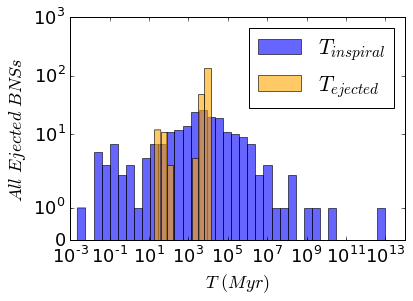

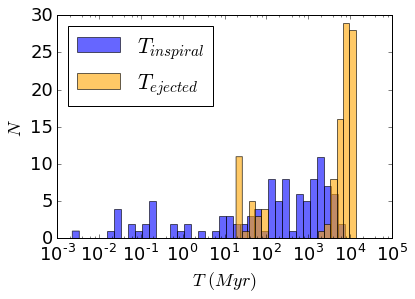

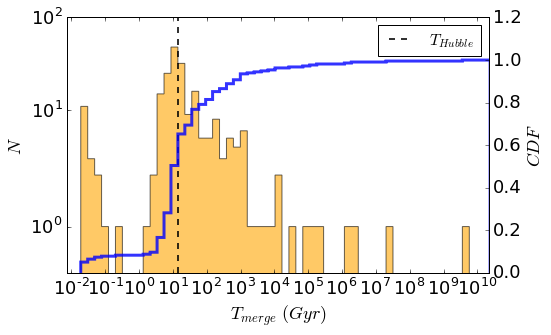

In [96]:
##Plot the distribution of the inspiral time of the escaped BNSs
datanum_all=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Escbns.dat')
t_inspiral_all=np.array(datanum_all[:,3]); t_esc_all=np.array(datanum_all[:,2])

datanum_merge=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Escmerger.dat')
t_inspiral_merge=np.array(datanum_merge[:,3]); t_esc_merge=np.array(datanum_merge[:,2])

ttot_all=t_inspiral_all+t_esc_all  ##in Myr
ttot_merge=t_inspiral_merge+t_esc_merge  ##in Myr
#print ttot_all/1000.

####Histogram for all the ejected BNSs####
plt.rcParams['figure.figsize'] = [6, 4]

plt.figure()
plt.hist(t_inspiral_all, bins=np.logspace(np.log10(min(t_inspiral_all)),np.log10(max(t_inspiral_all)), 40), 
         alpha=0.6, label=r'$T_{inspiral}$', log=True)
plt.hist(t_esc_all, bins=np.logspace(np.log10(min(t_esc_all)),np.log10(max(t_esc_all)), 10), 
         alpha=0.6, color='orange', label=r'$T_{ejected}$', log=True)
plt.xscale('log')
plt.yscale('symlog')
#plt.xlim(0.0005, 10**16)
plt.xlabel(r'$T\ (Myr)$')
plt.ylabel(r'$All\ Ejected\ BNSs$')
#plt.tight_layout()
plt.legend(loc='upper right')

plt.savefig(savepath+'times_hist_allbns.pdf', dpi=300, bbox_inches='tight')


####Histogram for the ejected BNSs that will merge within a Hubble time####
plt.rcParams['figure.figsize'] = [6, 4]

plt.figure()
plt.hist(t_inspiral_merge, bins=np.logspace(np.log10(min(t_inspiral_merge)),np.log10(max(t_inspiral_merge)), 40), 
         alpha=0.6, label=r'$T_{inspiral}$')
plt.hist(t_esc_merge, bins=np.logspace(np.log10(min(t_esc_merge)),np.log10(max(t_esc_merge)), 20), 
         alpha=0.6, color='orange', label=r'$T_{ejected}$')
plt.xscale('log')
#plt.yscale('symlog')
#plt.xlim(0.0005, 5*10**4)
plt.xlabel(r'$T\ (Myr)$')
plt.ylabel(r'$N$')
#plt.tight_layout()
plt.legend(loc='upper left')

plt.savefig(savepath+'times_hist_mergedbns.pdf', dpi=300, bbox_inches='tight')


####CDF for all the ejected BNSs####
plt.rcParams['figure.figsize'] = [8, 5]

fig, ax = plt.subplots(ncols=1)
ax1 = ax.twinx()
ax1.hist(ttot_all/1000., bins=np.logspace(np.log10(min(ttot_all/1000.)),np.log10(max(ttot_all/1000.)), 60), 
         range=(0., max(ttot_all/1000.)), alpha=0.8, cumulative=True, histtype='step', 
         normed=True, lw=3.0)
ax.hist(ttot_all/1000., bins=np.logspace(np.log10(min(ttot_all/1000.)),np.log10(max(ttot_all/1000.)), 60), 
        color='orange', alpha=0.6, histtype='stepfilled')
ax.axvline(x=14., color='k', ls='--', lw=2.0, label=r'$T_{Hubble}$', alpha=0.8)
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlim(min(ttot_all/1000.)*0.4, max(ttot_all/1000.)*0.9)
ax.set_xlabel(r'$T_{merge}\ (Gyr)$')
ax1.set_ylim(0, 1.2)
ax1.set_ylabel(r'$CDF$')
ax.set_ylabel(r'$N$')
fig.tight_layout()
ax.legend(loc='upper right', prop={'size': 16}, frameon=True)

plt.savefig(savepath+'times_cdf_allbns.pdf', dpi=300, bbox_inches='tight')


2.4344726021e+13


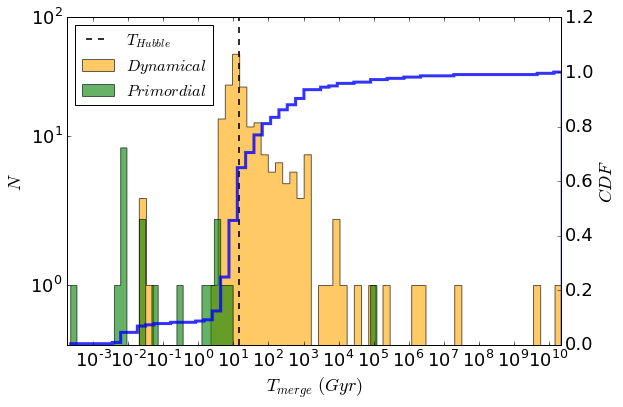

In [26]:
##Plot the distribution of the merger time (Tmerger=Tformation to Tmerge)
incluster=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Incluster.dat')
gwcap=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/GWcap.dat')
escbns=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/Escbns_new.dat')
fmc=np.genfromtxt('/projects/b1011/syr904/projects/SGRB/extrememodels/fmchannel_allescbns.dat')

fmflag=fmc[:,3]

##All time in Myr
tesc=np.array(escbns[:,2]); tinsp=np.array(escbns[:,3]); tfm=np.array(escbns[:,10])
tesc_merger=tinsp+tfm
print max(tesc_merger)

tmerger_pri=[]; tmerger_dyn=[]
for i in range(len(fmflag)):
    if fmflag[i]==1:
        tmerger_pri.append(tesc_merger[i])
    else:
        tmerger_dyn.append(tesc_merger[i])

tmerger_pri=np.array(tmerger_pri)
tmerger_dyn=np.array(tmerger_dyn)

plt.rcParams['figure.figsize'] = [9, 6]

fig, ax = plt.subplots(ncols=1)
ax1 = ax.twinx()
ax1.hist(tesc_merger/1000., bins=np.logspace(np.log10(min(tesc_merger/1000.)),np.log10(max(tesc_merger/1000.)), 60), 
         range=(0., max(tesc_merger/1000.)), alpha=0.8, cumulative=True, histtype='step', 
         normed=True, lw=3.0)
#ax.hist(tesc_merger/1000., bins=np.logspace(np.log10(min(tesc_merger/1000.)),np.log10(max(tesc_merger/1000.)), 60), 
#        color='orange', alpha=0.6, histtype='stepfilled')
ax.hist(tmerger_dyn/1000., bins=np.logspace(np.log10(min(tmerger_dyn/1000.)),np.log10(max(tmerger_dyn/1000.)), 60), 
        color='orange', alpha=0.6, histtype='stepfilled', label=r'$Dynamical$')
ax.hist(tmerger_pri/1000., bins=np.logspace(np.log10(min(tmerger_pri/1000.)),np.log10(max(tmerger_pri/1000.)), 50), 
        color='green', alpha=0.6, histtype='stepfilled', label=r'$Primordial$')
ax.axvline(x=14., color='k', ls='--', lw=2.0, label=r'$T_{Hubble}$', alpha=0.8)
ax.set_xscale('log')
ax.set_yscale('symlog')
ax.set_xlim(min(tesc_merger/1000.)*0.8, max(tesc_merger/1000.)*0.9)
ax.set_xlabel(r'$T_{merge}\ (Gyr)$')
ax1.set_ylim(0, 1.2)
ax1.set_ylabel(r'$CDF$')
ax.set_ylabel(r'$N$')
fig.tight_layout()
ax.legend(loc='upper left', prop={'size': 16}, frameon=True)

plt.savefig(savepath+'Tmerger_cdf_allbns.pdf', dpi=300, bbox_inches='tight')